In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_song_by_artist = pd.read_csv('./data/songs_by_artist.csv', 
                             header = None, 
                             names = ['date', 'play', 'download', 'like', 'artist_id'])

In [3]:
df_user_actions = pd.read_csv('./data/mars_tianchi_user_actions.csv', 
                              header = None, 
                              names = ('user_id', 'song_id', 'gmt_create', 'action_type', 'Ds'))

In [4]:
df_song_info = pd.read_csv('./data/mars_tianchi_songs.csv', 
                           header = None, 
                           names = ('song_id', 'artist_id', 'public_time',
                                    'popular', 'language', 'gender'))

In [5]:
artist_id = list(set(df_song_by_artist['artist_id']))

** 将一首歌曲按照天分开，统计逐小时的播放量 **

- 为user_action表添加小时数据段

使用dataframe的apply方法，对一个Series进行操作，应用自定义的函数获取小时字段

In [6]:
def get_hour(time_value):
    time_value = time.localtime(time_value)
    return time_value.tm_hour

def get_wday(time_value):
    time_value = time.localtime(time_value)
    return time_value.tm_wday+1

In [7]:
df_user_actions['hour'] = df_user_actions['gmt_create'].apply(get_hour)

In [8]:
df_user_actions.head()

,user_id,song_id,gmt_create,action_type,Ds,hour
0,7063b3d0c075a4d276c5f06f4327cf4a,effb071415be51f11e845884e67c0f8c,1426406400,1,20150315,16
1,0db66c0dd3993fd3504bb98c3beb15b3,f87ff481d85d2f95335ab602f38a7655,1426417200,1,20150315,19
2,f8c065dc140ec74c6e44144164e618e3,8a27d9a6c59628c991c154e8d93f412e,1426406400,2,20150315,16
3,2c6082cf0d68e244f2a10325e8d1b85b,ecea5fe33e6817d09c395f2910479728,1426417200,1,20150315,19
4,2c6082cf0d68e244f2a10325e8d1b85b,31a3d0420d89c9b121bb55dbdbbeda6b,1426417200,1,20150315,19


In [9]:
df_user_actions['wday'] = df_user_actions['gmt_create'].apply(get_wday)

In [10]:
df_user_actions.head()

,user_id,song_id,gmt_create,action_type,Ds,hour,wday
0,7063b3d0c075a4d276c5f06f4327cf4a,effb071415be51f11e845884e67c0f8c,1426406400,1,20150315,16,7
1,0db66c0dd3993fd3504bb98c3beb15b3,f87ff481d85d2f95335ab602f38a7655,1426417200,1,20150315,19,7
2,f8c065dc140ec74c6e44144164e618e3,8a27d9a6c59628c991c154e8d93f412e,1426406400,2,20150315,16,7
3,2c6082cf0d68e244f2a10325e8d1b85b,ecea5fe33e6817d09c395f2910479728,1426417200,1,20150315,19,7
4,2c6082cf0d68e244f2a10325e8d1b85b,31a3d0420d89c9b121bb55dbdbbeda6b,1426417200,1,20150315,19,7


- 对单首歌曲进行分析

选择歌曲“ecea5fe33e6817d09c395f2910479728”

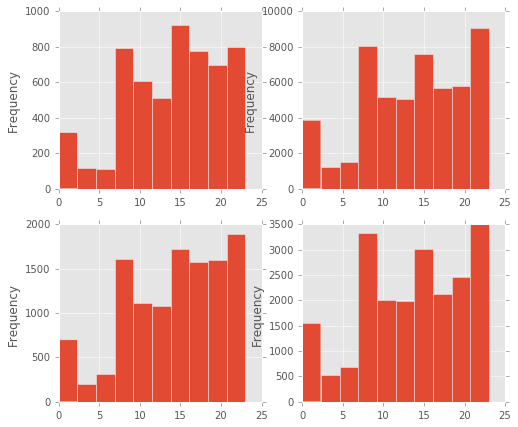

In [49]:
fig = plt.figure(figsize=(8, 7))

ax1 = fig.add_subplot(2, 2, 1)

df_user_actions[(df_user_actions.song_id == "ecea5fe33e6817d09c395f2910479728")
                                 & (df_user_actions.action_type == 1)]['hour'].plot.hist()

ax2 = fig.add_subplot(2, 2, 2)

df_user_actions[(df_user_actions.song_id == "8a27d9a6c59628c991c154e8d93f412e")
                                 & (df_user_actions.action_type == 1)]['hour'].plot.hist()

ax3 = fig.add_subplot(2, 2, 3)

df_user_actions[(df_user_actions.song_id == "31a3d0420d89c9b121bb55dbdbbeda6b")
                                 & (df_user_actions.action_type == 1)]['hour'].plot.hist()

ax4 = fig.add_subplot(2, 2, 4)

df_user_actions[(df_user_actions.song_id == "f87ff481d85d2f95335ab602f38a7655")
                                 & (df_user_actions.action_type == 1)]['hour'].plot.hist()

# 方案1
** 读取按照歌手统计的每日歌曲播放量数据，计算平均值，生成输出表格**

In [6]:
dates = pd.date_range('20150901', '20151030')

In [7]:
df_song_by_artist

,date,play,download,like,artist_id
0,2015-03-01,58,10,0,e087f8842fe66efa5ccee42ff791e0ca
1,2015-03-02,99,61,0,e087f8842fe66efa5ccee42ff791e0ca
2,2015-03-03,125,84,5,e087f8842fe66efa5ccee42ff791e0ca
3,2015-03-04,273,19,0,e087f8842fe66efa5ccee42ff791e0ca
4,2015-03-05,172,69,0,e087f8842fe66efa5ccee42ff791e0ca
5,2015-03-06,313,46,0,e087f8842fe66efa5ccee42ff791e0ca
6,2015-03-07,99,17,0,e087f8842fe66efa5ccee42ff791e0ca
7,2015-03-08,132,32,0,e087f8842fe66efa5ccee42ff791e0ca
8,2015-03-09,100,16,0,e087f8842fe66efa5ccee42ff791e0ca
9,2015-03-10,94,150,0,e087f8842fe66efa5ccee42ff791e0ca


In [10]:
df_song_by_artist.describe()

,play,download,like
count,9150.000000,9150.000000,9150.000000
mean,522.798142,88.789836,6.142295
std,647.251490,146.886321,9.213115
min,0.000000,0.000000,0.000000
25%,118.000000,17.000000,1.000000
50%,304.000000,43.000000,3.000000
75%,711.000000,96.000000,8.000000
max,8489.000000,3136.000000,150.000000


In [14]:
for artist in artist_id[:]:
    data = df_song_by_artist[df_song_by_artist['artist_id'] == artist]
    data_mean = data.mean(axis = 0)
    data_mean_play = data_mean[0]
    temp = pd.DataFrame(data={'artist_id':artist, 'play':int(data_mean_play)}, index=dates)
    temp['date']=dates
#     print temp
    temp.to_csv('./output/mean_by_artist.csv', mode = 'a', encoding='utf-8', date_format = "%Y%m%d", 
                index = False,header = False)

In [3]:
pd.date_range('20160501', '20160522')

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-21', '2016-05-22'],
              dtype='datetime64[ns]', freq='D')